In [57]:
import pandas as pd
import numpy as np
from rich import print
import matplotlib.pyplot as plt
import astropy.coordinates as coord
import astropy.units as u
import warnings

In [55]:
def counts2flux(cps, band):
    scale = 1.4e-15 if band == 'FUV' else 2.06e-16
    return scale*cps

def counts2mag(cps, band):
    scale = 18.82 if band == 'FUV' else 20.08
    # This threw a warning if the countrate was negative which happens when
    #  the background is brighter than the source. Suppress.
    with np.errstate(invalid='ignore'):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            mag = -2.5 * np.log10(cps) + scale
    return mag

def mag2counts(mag, band):
    scale = 18.82 if band == 'FUV' else 20.08
    return 10.**(-(mag-scale)/2.5)

In [20]:
tbl = pd.read_csv('gfcat_visit_table_lcstats.csv',index_col=None)
tbl.replace('--',np.nan,inplace=True)

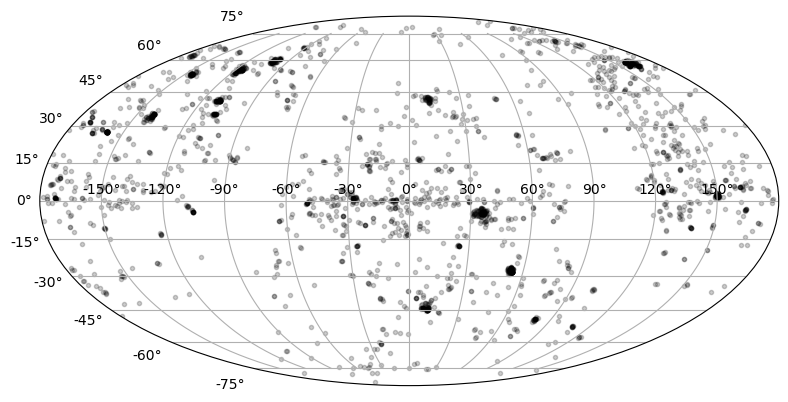

In [76]:
ra = coord.Angle(tbl['ra'],unit=u.degree)
dec = coord.Angle(tbl['dec'],unit=u.degree)
ra = ra.wrap_at(180*u.degree)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian, alpha=0.2, marker='.', color='k')
ax.grid(True)
plt.tight_layout()
plt.savefig('total_coverage.png',dpi=150)
plt.savefig('total_coverage.pdf',dpi=150)

(12.0, 20.0)

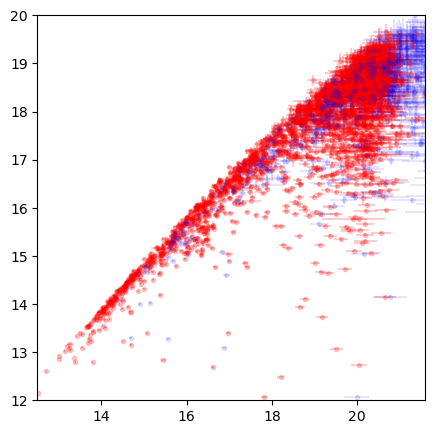

In [71]:
plt.figure(figsize=(5,5))
plt.errorbar(np.array(tbl['mag_min_NUV'],dtype=float),
             np.array(tbl['mag_max_NUV'],dtype=float),
             xerr=np.array(tbl['mag_min_err_NUV'],dtype=float),
             yerr=np.array(tbl['mag_max_err_NUV'],dtype=float),
             fmt='.',marker=None,color='r',alpha=0.2)
plt.errorbar(np.array(tbl['mag_min_FUV'],dtype=float),
             np.array(tbl['mag_max_FUV'],dtype=float),
             xerr=np.array(tbl['mag_min_err_FUV'],dtype=float),
             yerr=np.array(tbl['mag_max_err_FUV'],dtype=float),
             fmt='.',marker=None,color='b',alpha=0.1)
plt.xlim([12.5,counts2mag(0.25,'NUV')])
plt.ylim([12,20])

In [90]:
print(tbl.sort_values('eclipse')[['eclipse','ra','dec','simbad_otype']].iloc[:20].to_latex(index=False))

/var/folders/pm/szdr5c1j3vz19xvrxpps_wfc0000gn/T/ipykernel_17140/3216758579.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(tbl.sort_values('eclipse')[['eclipse','ra','dec','simbad_otype']].iloc[:20].to_latex(index=False))


\begin{tabular}{rrrl}
\toprule
 eclipse &         ra &        dec & simbad\_otype \\
\midrule
     927 & 249.909813 &  41.112522 &      RRLyrae \\
    1413 & 311.565113 &  -4.930670 &    Low-Mass* \\
    1414 & 312.374664 &  -5.677969 &       PulsV* \\
    1420 & 315.935391 &  -7.379244 &    Low-Mass* \\
    1422 & 343.352654 & -39.793072 &       Galaxy \\
    1534 & 259.445075 &  59.689607 &         Star \\
    1573 & 261.421238 &  59.258315 &         Star \\
    1580 & 261.421362 &  59.258397 &         Star \\
    1586 & 260.952573 &  58.946647 &         Star \\
    1607 & 261.421152 &  59.257994 &         Star \\
    1607 & 260.552773 &  59.014678 &         Star \\
    1623 & 259.204219 &  60.039535 &          QSO \\
    1640 & 260.307220 &  58.102305 &         Star \\
    1646 & 258.737610 &  58.857582 &      RSCVnV* \\
    1647 & 258.737700 &  58.857525 &      RSCVnV* \\
    1653 & 258.737691 &  58.857594 &      RSCVnV* \\
    1654 & 258.737465 &  58.857591 &      RSCVnV* \\
    1731 & 340.316883 &  12.165311 &          NaN \\
    1740 & 350.755035 &  -0.022014 &         Star \\
    1754 & 339.945002 &  11.979216 &         Star \\
\bottomrule
\end{tabular}

In [ ]:
tbl.to